In [47]:
import warnings
from pathlib import Path
from matplotlib import pyplot as plt

import gensim
import nltk
import pandas as pd
import pyLDAvis.gensim_models
import spacy
from gensim import corpora
from nltk.corpus import stopwords

# Pakete für NLP
from wordcloud import WordCloud

nltk.download("stopwords")  # start the NLTK Downloader and download the stopwords
# Modellpersistenz

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sebastianh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
toots_path = Path() / "german_toots.pqt"
german_sentiment_df = pd.read_parquet(toots_path)
german_sentiment_df

,id,user_id,user_name,toot_id,content,date,language,day,week,weekday,hour,cleared_content,has_content?,bavarian_users,followers,mentioned_party,domentent_party,detected_languages,sentiment
0,4,43,taz@squeet.me,110973983344028577,In der Flugblattaffäre sind noch immer viele F...,2023-08-29 15:38:00,de,241,35,2,15,In der Flugblattaffäre sind noch immer viele F...,True,False,18270,fw,fw,de,-0.000564
1,10,5,andreas@social.blogsequenz.de,110973505957085104,<p>Fall jemand meinen uralten Schulranzen im A...,2023-08-29 15:01:57,de,241,35,2,15,Fall jemand meinen uralten Schulranzen im Anti...,True,False,152,"csu, fw",fw,de,-0.944469
2,12,7,stefanmuelller@climatejustice.social,110973482629635037,"<p>7/ Oh, die FW haben 14% in <a href=""https:/...",2023-08-29 14:55:55,de,241,35,2,14,"7/ Oh, die FW haben 14% in Bayern und die noAF...",True,False,1728,fw,fw,de,-0.029815
3,13,8,Sanneforpeace@norden.social,110973467401852205,"<p><span class=""h-card""><a href=""https://socia...",2023-08-29 14:52:09,de,241,35,2,14,"andreas Picasso Na, dann kann ich es mir ja sp...",True,False,172,"csu, fw",fw,de,-0.964399
4,14,9,Azeckenbiss@dju.social,110973331267985860,"<p>""Hinter solchen Flugblatt­aktionen stecke a...",2023-08-29 14:17:28,de,241,35,2,14,Hinter solchen Flugblatt­aktionen stecke also ...,True,False,3257,fw,fw,de,-0.004730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5596,32934,4501,TerryReintke@respublicae.eu,111433091641512277,"<p>RT by <span class=""h-card""><a href=""https:/...",2023-11-18 19:00:36,en,322,46,6,19,RT by TerryReintke : Eine überfallartig gekape...,True,False,821,afd,afd,de,-0.002703
5597,32951,164,elfentroll@nrw.social,111433356886519829,"<p>MuHa, großdeutscher <a href=""https://nrw.so...",2023-11-18 20:08:06,de,322,46,6,20,"MuHa, großdeutscher AfD - NAZIPuff im bayrisch...",True,False,132,afd,afd,de,-0.427801
5598,32961,1299,0x3mi@mas.to,111433541382809359,"<p><span class=""h-card"" translate=""no""><a href...",2023-11-18 20:55:02,de,322,46,6,20,risa spirelli mich nervt es auch das man kaum ...,True,False,259,linke,linke,de,-0.986509
5599,33009,225,angeldruckt@sueden.social,111433812712832388,"<p><span class=""h-card"" translate=""no""><a href...",2023-11-18 22:04:01,de,322,46,6,22,"BerlinVic Es gibt zu viele Leute, die sie wähl...",True,True,201,fdp,fdp,de,-0.010498


In [3]:
# remove stopwords
nltk_stop_words = set(stopwords.words("german"))  # Selecting nltk stopwords
len(nltk_stop_words)

232

In [4]:
nlp = spacy.load("de_core_news_lg")
spacy_stop_words = set(nlp.Defaults.stop_words)
len(spacy_stop_words)

543

In [5]:
extra_stop_words = {
    "wird",
    "war",
    "werden",
    "hat",
    "haben",
    "nicht",
    "ist",
    "sind",
    "sein",
    "steht",
    "mal",
    "machen",
    "können",
    "ein",
    "einen",
    "noch",
    "da",
    "amp",
    "bleiben",
    "finden",
    "geben",
    "  ",
    " ",
    "",
    "+",
    "&",
    "%",
}
stop_words = nltk_stop_words | spacy_stop_words | extra_stop_words
len(stop_words)

579

In [6]:
german_sentiment_without_stop_words = german_sentiment_df.cleared_content.apply(
    lambda text: " ".join([word.strip() for word in text.lower().split(" ") if word.strip() not in stop_words])
)

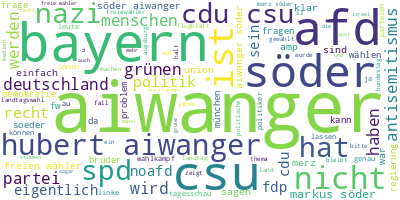

In [7]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
long_string = ",".join(german_sentiment_without_stop_words)
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=5, contour_color="steelblue")
wordcloud.generate(long_string)
wordcloud.to_image()

In [13]:
data_words = []

for words in german_sentiment_without_stop_words:
    doc = nlp(words.lower())
    data_words.append([x.lemma_.lower() for x in doc])
    
# filter for stopwords after lemmatizing again, just to make sure
data_words = [[x for x in data_word if x not in stop_words] for data_word in data_words] 
german_sentiment_df["lemma"] = data_words

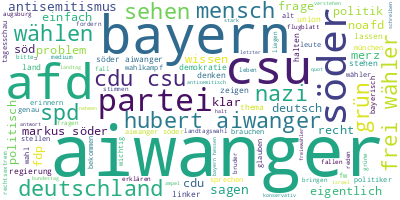

In [14]:
long_string = ",".join([x for data_word in data_words for x in data_word])
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=5, contour_color="steelblue")
wordcloud.generate(long_string)
wordcloud.to_image()

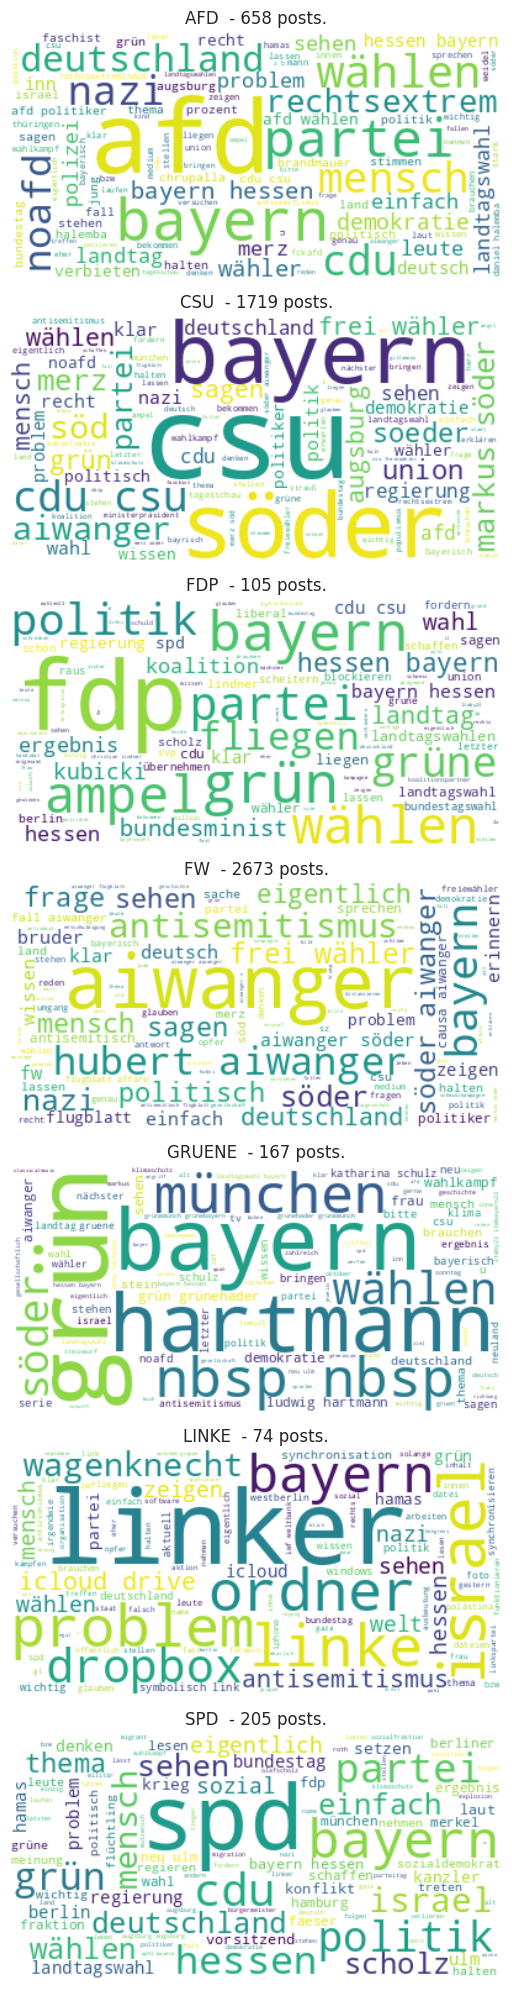

In [51]:
texts = german_sentiment_df.set_index("domentent_party").lemma
party_texts = {}
for i, v in texts.items():
    if i not in party_texts:
        party_texts[i] = [v]
    else:
        party_texts[i].append(v)
parties = set(german_sentiment_df.domentent_party)

fig, axs = plt.subplots(nrows=len(parties), ncols=1, figsize=(20, 20))

for i, party in enumerate(sorted(parties)):
    party_long_text = ",".join([word for text in party_texts[party] for word in text])
    wc = WordCloud(background_color="white", max_words=100, contour_width=5, contour_color="steelblue").generate(party_long_text)
    axs[i].imshow(wc, interpolation="bilinear")
    axs[i].set_title(f"{party.upper()}  - {len(party_texts[party])} posts.")
    axs[i].axis("off")
    
plt.tight_layout()
plt.show()

In [176]:
# Quelle: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# filter words that show up less than 15 times, more than 50% of the time and keep it to 10.000 Words
id2word.filter_extremes(no_below=15, no_above=0.50, keep_n=10000)

# Create Corpus
texts = data_words

# Term Document Frequency
# Converts a collection of words to  a list of (word_id, word_frequency) 2-tuples.
corpus = [id2word.doc2bow(text) for text in texts]
corpus[0]

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]

In [177]:
def get_model(corpus, id2word, num_topics, random_state=0):
    return gensim.models.LdaMulticore(
        corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=random_state
    )

In [178]:
pyLDAvis.enable_notebook()

In [179]:
num_topics = 15
lda_model = get_model(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=2)
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.046859  0.041104       1        1  10.932927
7     -0.010789  0.020950       2        1   8.711822
1      0.007439 -0.000278       3        1   7.961187
10    -0.008528 -0.002494       4        1   7.646747
2      0.001572  0.008189       5        1   6.949876
6      0.036969 -0.055211       6        1   6.755722
0      0.013523 -0.017479       7        1   6.604982
4     -0.017911  0.013844       8        1   6.336855
12    -0.002796  0.044326       9        1   5.981338
14    -0.002639 -0.005550      10        1   5.941866
11     0.036742  0.011936      11        1   5.714807
13     0.002753 -0.080409      12        1   5.513238
8     -0.044552 -0.006846      13        1   5.345517
5     -0.059247 -0.010414      14        1   5.108349
3      0.094323  0.038332      15        1   4.494769, topic_info=          Term         Freq        Total Category  logprob  loglift
1060  augsburg   238.000000   238.000000  Default  30.0000  30.0000
12       söder  1245.000000  1245.000000  Default  29.0000  29.0000
174        spd   286.000000   286.000000  Default  28.0000  28.0000
62         csu  1378.000000  1378.000000  Default  27.0000  27.0000
233        fdp   175.000000   175.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
197    einfach    11.775698   192.163720  Topic15  -5.3207   0.3099
149     wähler    12.533759   357.531174  Topic15  -5.2583  -0.2485
726     hessen    11.565133   235.198778  Topic15  -5.3387   0.0898
259       nazi    11.207370   221.438977  Topic15  -5.3701   0.1187
335      thema    10.292092   145.704555  Topic15  -5.4553   0.4521

[1002 rows x 6 columns], token_table=      Topic      Freq Term
term                      
862       1  0.185941    '
862       2  0.092970    '
862       3  0.092970    '
862       4  0.046485    '
862       5  0.139456    '
...     ...       ...  ...
545      11  0.023681    🤷
545      12  0.047363    🤷
545      13  0.071044    🤷
545      14  0.165769    🤷
545      15  0.047363    🤷

[6467 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 2, 11, 3, 7, 1, 5, 13, 15, 12, 14, 9, 6, 4])